# Example : Spin-Boson model

### Introduction

The HEOM method solves the dynamics and steady state of a system and its environment, the latter of which is encoded in a set of auxiliary density matrices.

In this example we show the evolution of a single two-level system in contact with a single Bosonic environment.  The properties of the system are encoded in Hamiltonian, and a coupling operator which describes how it is coupled to the environment.

The Bosonic environment is implicitly assumed to obey a particular Hamiltonian , the parameters of which are encoded in the spectral density, and subsequently the free-bath correlation functions.


### Bosonic Enviorement

$$
H=H_{\mathrm{S}}(t)+\sum_k \omega_k a_k^{\dagger} a_k+Q \sum_k g_k\left(a_k+a_k^{\dagger}\right)
$$


$$
H_{\mathrm{S}}=\frac{\epsilon}{2} \sigma_z+\frac{\Delta}{2} \sigma_x
$$

$$
Q=\sigma_z
$$

where we can define the spectral density as:

$$
J(\omega)=\pi \sum_k\left|g_k\right|^2 \delta\left(\omega-\omega_k\right)
$$

and the Correlation function:

$$
C(\tau)=\langle\bar{X}(t+\tau) \bar{X}(t)\rangle
$$

where:  $$ X=\sum_h g_k\left(a_k+a_k^{\dagger}\right) $$



Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.



### HEOM

The correlation function:
$$
C(t)=C_R(t)+i C_I(t)
$$

The evolution of the system is given by the influence of the bath operators in term of the real and imaginaty part of the correlation function:

$$
\bar{\rho}_{\mathrm{S}}(t)=\mathcal{T} \exp \left\{-\int_0^t d t_2 \int_0^{t_2} d t_1 \bar{Q}\left(t_2\right)^{\times}\left[C_R\left(t_2-t_1\right) \bar{Q}\left(t_1\right)^{\times}+i C_I\left(t_2-t_1\right) \bar{Q}\left(t_1\right)^{\circ}\right]\right\} \bar{\rho}_{\mathrm{S}}(0)
$$

$$
\bar{Q}(t)^{\times}=[\bar{Q}(t), .], \quad \text { and } \quad \bar{Q}(t)^{\circ}=\{\bar{Q}(t), .\}
$$

HEOM is based in the expansion of the Correlation funtions in exponencial functions in time. 


$$
\begin{aligned}
C_R(t) & =\sum_{k=1}^{N_R} c_k^R e^{-\gamma_k^R t} \\
C_I(t) & =\sum_{k=1}^{N_I} c_k^I e^{-\gamma_k^I t}
\end{aligned}
$$
where $c_k^j$ and $\gamma_k^j$  themselves can be real or complex.  formally taking repeated time derivatives of the system evolution equation, one can arrive at an infinite set of coupled first-order differential
equations

$$
\begin{aligned}
\dot{\rho}^n(t) & =\left(\mathcal{L}-\sum_{j=R, I} \sum_{k=1}^{N_j} n_{j k} \gamma_k^j\right) \rho^n(t) \\
& -i \sum_{k=1}^{N_R} c_k^R n_{R k} Q^{\times} \rho^{n_{R k}^{-}}(t)+\sum_{k=1}^{N_I} c_k^I n_{I k} Q^{\circ} \rho^{n_{I k}^{-}}(t) \\
& -i \sum_{j=R, I} \sum_{k=1}^{N_j} Q^{\times} \rho^{n_{j k}^{+}}(t)
\end{aligned}
$$


### Drude-Lorentz  spectral density
The Drude-Lorentz spectral density is:

$$J_D(\omega)= 2 \lambda \frac{\omega\gamma}{{\gamma}^2 + \omega^2}$$

where $\lambda$ scales the coupling strength, and $\gamma$ is the cut-off frequency.  We use the convention,
\begin{equation*}
C(\tau) = \int_0^{\infty} d\omega \frac{J_D(\omega)}{\pi}[\coth(\beta\omega) \cos(\omega \tau) - i \sin(\omega \tau)]
\end{equation*}

With the HEOM we must use an exponential decomposition:

$$
\begin{aligned}
C(t) & =C_{\text {real }}(t)+i C_{\text {imag }}(t) \\
C_{\text {real }}(t) & =\sum_{k=0}^{\infty} c_{k, \text { real }} e^{-\nu_{k, \text { real }} t} \\
C_{\text {imag }}(t) & =\sum_{k=0}^{\infty} c_{k, \text { imag }} e^{-\nu_{k, \text { imag }} t}
\end{aligned}
$$

As an example, the Matsubara decomposition of the Drude-Lorentz spectral density is given by:

$$
\begin{array}{r}
\nu_{k, \text { real }}= \begin{cases}\gamma & k=0 \\
2 \pi k / \beta & k \geq 1\end{cases} \\
c_{k, \text { real }}= \begin{cases}\lambda \gamma[\cot (\beta \gamma / 2)-i] & k=0 \\
\frac{4 \lambda \gamma \nu_k}{\left(\nu_k^2-\gamma^2\right) \beta} & k \geq 1\end{cases}
\end{array}
$$

$$
\begin{gathered}
\nu_{k, \text { imag }}= \begin{cases}\gamma & k=0 \\
0 & k \geq 1\end{cases} \\
c_{k, \text { imag }}= \begin{cases}-\lambda \gamma & k=0 \\
0 & k \geq 1\end{cases}
\end{gathered}
$$


In [16]:
from qutip import basis, sigmax, sigmaz
import numpy as np
from qutip import *
%pylab inline
%load_ext autoreload
%autoreload 2

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)



Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/luis/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['identity', 'axes', 'squeeze', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [40]:

# The system Hamiltonian:
eps = 0.5  # energy of the 2-level system
Del = 1.0  # tunnelling term
H_sys = 0.5 * eps * sigmaz() + 0.5 * Del * sigmax()

# Initial state of the system:
rho0 = basis(2,0) * basis(2,0).dag()

In [41]:
# Bath properties:
gamma = 0.5  # cut off frequency
lam = 0.1  # coupling strength
T = 0.5  # temperature

# System-bath coupling operator:
Q = sigmaz()

In [42]:
from qutip.nonmarkov.heom import DrudeLorentzBath
from qutip.nonmarkov.heom import DrudeLorentzPadeBath

# Number of expansion terms to retain:
Nk = 2

# Matsubara expansion:
bath = DrudeLorentzBath(Q, lam, gamma, T, Nk)

# Padé expansion:
#bath = DrudeLorentzPadeBath(Q, lam, gamma, T, Nk)

In [43]:
from qutip.nonmarkov.heom import HEOMSolver
from qutip import Options

max_depth = 5  # maximum hierarchy depth to retain
options = Options(nsteps=15_000, store_states=True)

solver = HEOMSolver(H_sys, bath, max_depth=max_depth, options=options)

In [47]:
# Define the operators that measure the populations of the two
# system states:
P11p = basis(2,0) * basis(2,0).dag()
P22p = basis(2,1) * basis(2,1).dag()

# Define the operator that measures the 0, 1 element of density matrix
# (corresonding to coherence):
P12p = basis(2,0) * basis(2,1).dag()

tlist = np.linspace(0, 20, 1001)
#result = solver.run(rho0, tlist, e_ops={"11": P11p, "22": P22p, "12": P12p})
result = solver.run(rho0, tlist)

In [48]:
# Calculate expectation values in the bases
P11exp = expect(result.states, P11p)
P22exp = expect(result.states, P22p)
P12exp = expect(result.states, P12p)


/home/luis/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


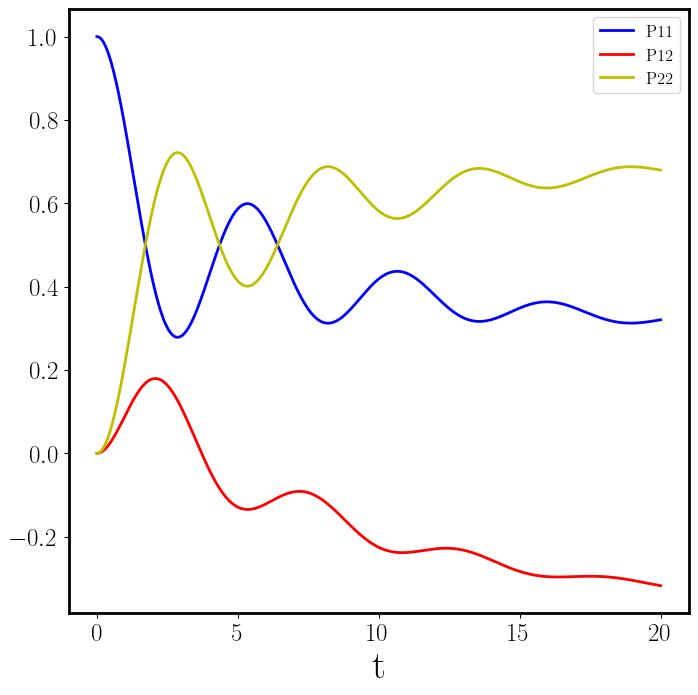

In [49]:
# Plot the results:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
#axes.plot(result.times, result.expect["11"], 'b', linewidth=2, label="P11")
#axes.plot(result.times, result.expect["12"], 'r', linewidth=2, label="P12")
axes.plot(tlist, P11exp, 'b', linewidth=2, label="P11")
axes.plot(tlist, P12exp, 'r', linewidth=2, label="P12")
axes.plot(tlist, P22exp, 'y', linewidth=2, label="P22")
axes.set_xlabel(r't', fontsize=28)
axes.legend(loc=0, fontsize=12)

In [50]:
steady_state, steady_ados = solver.steady_state()

In [51]:
print(steady_state)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.29945549 -0.36355841]
 [-0.36355841  0.70054451]]


In [52]:
# Matsubara expansion:
bath = DrudeLorentzBath(Q, lam, gamma, T, Nk)

# Padé expansion:
#bath = DrudeLorentzPadeBath(Q, lam, gamma, T, Nk)

# Add terminator to the system Liouvillian:
delta, terminator = bath.terminator()
HL = liouvillian(H_sys) + terminator

# Construct solver:
solver = HEOMSolver(HL, bath, max_depth=max_depth, options=options)

In [55]:
print(terminator)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[ 0.          0.          0.          0.        ]
 [ 0.         -0.01602647  0.          0.        ]
 [ 0.          0.         -0.01602647  0.        ]
 [ 0.          0.          0.          0.        ]]


In [59]:
result = solver.run(rho0, tlist)

/home/luis/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


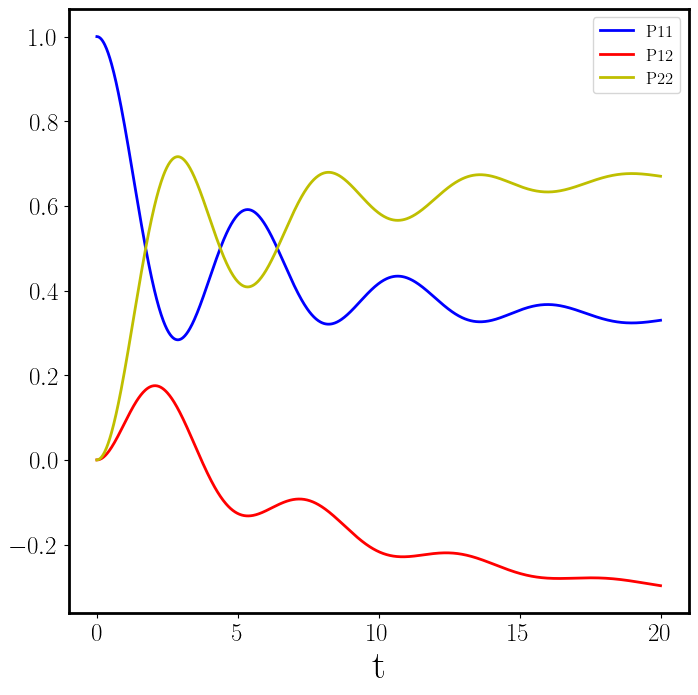

In [60]:
P11exp = expect(result.states, P11p)
P22exp = expect(result.states, P22p)
P12exp = expect(result.states, P12p)

# Plot the results:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
#axes.plot(result.times, result.expect["11"], 'b', linewidth=2, label="P11")
#axes.plot(result.times, result.expect["12"], 'r', linewidth=2, label="P12")
axes.plot(tlist, P11exp, 'b', linewidth=2, label="P11")
axes.plot(tlist, P12exp, 'r', linewidth=2, label="P12")
axes.plot(tlist, P22exp, 'y', linewidth=2, label="P22")
axes.set_xlabel(r't', fontsize=28)
axes.legend(loc=0, fontsize=12)

In [56]:
# Convenience functions and parameters:

def cot(x):
    return 1. / np.tan(x)

beta = 1. / T

# Number of expansion terms to calculate:
Nk = 2

# C_real expansion terms:
ck_real = [lam * gamma / np.tan(gamma / (2 * T))]
ck_real.extend([
    (8 * lam * gamma * T * np.pi * k * T /
        ((2 * np.pi * k * T)**2 - gamma**2))
    for k in range(1, Nk + 1)
])
vk_real = [gamma]
vk_real.extend([2 * np.pi * k * T for k in range(1, Nk + 1)])

# C_imag expansion terms (this is the full expansion):
ck_imag = [lam * gamma * (-1.0)]
vk_imag = [gamma]

In [58]:
from qutip.nonmarkov.heom import BosonicBath

bath = BosonicBath(Q, ck_real, vk_real, ck_imag, vk_imag)

In [62]:
solver = HEOMSolver(HL, bath, max_depth=max_depth, options=options)
result = solver.run(rho0, tlist)

/home/luis/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


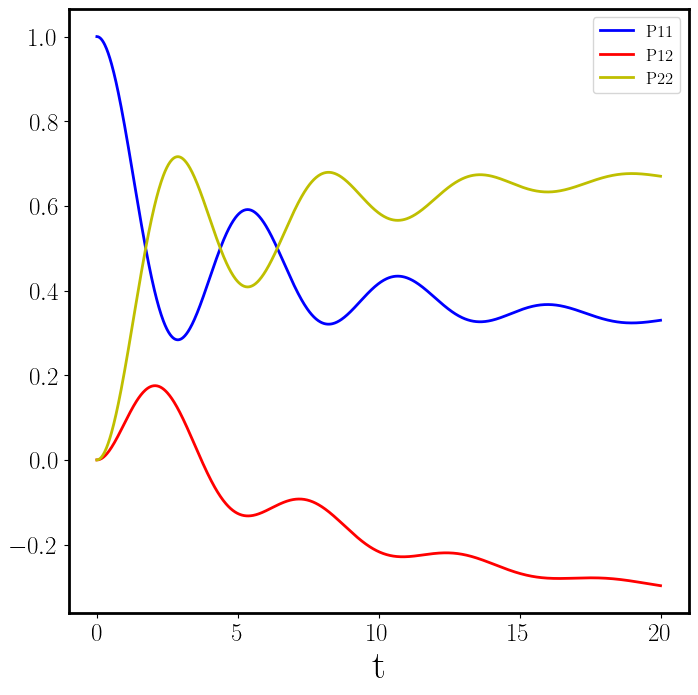

In [63]:
P11exp = expect(result.states, P11p)
P22exp = expect(result.states, P22p)
P12exp = expect(result.states, P12p)

# Plot the results:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
#axes.plot(result.times, result.expect["11"], 'b', linewidth=2, label="P11")
#axes.plot(result.times, result.expect["12"], 'r', linewidth=2, label="P12")
axes.plot(tlist, P11exp, 'b', linewidth=2, label="P11")
axes.plot(tlist, P12exp, 'r', linewidth=2, label="P12")
axes.plot(tlist, P22exp, 'y', linewidth=2, label="P22")
axes.set_xlabel(r't', fontsize=28)
axes.legend(loc=0, fontsize=12)